# **Analyzing the features that impact on Developer Salaries Using Machine Learning - Project Data Science Blog**

The goal of this project is to analyze how different factors (education levels, country, work experience, platforms used and other) influence developer salaries and build a machine learning model to predict salaries based on education and other factors.

Author: Carolina Barros

### Table of Contents
1. [Introduction & Objective](#1-introduction--objective)
2. [Importing Libraries](#2-importing-libraries)
3. [Loading the Dataset](#3-loading-the-dataset)
4. [Data Cleaning & Preprocessing](#4-data-cleaning--preprocessing)
5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
6. [Feature Engineering](#6-feature-engineering-if-applicable)
7. [Splitting Data into Training & Testing Sets](#7-splitting-data-into-training--testing-sets)
8. [Model Training](#8-model-training)
9. [Model Performance Metrics](#9-model-performance-metrics)
10. [Conclusion & Future Work](#10-conclusion--future-work)


### 1. Introduction & Objective
This notebook analyzes the dataset and builds a predictive model.


### 2. Importing Libraries

In [1]:
# Required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### 3. Loading the Dataset

In [2]:
# Load dataset , that I prepared in the notebook data_preparation
df = pd.read_csv("../data/dataset.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display first few rows
df.head()

,ResponseId,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,WorkExp,Industry,JobSat,ConvertedCompYearly
0,73,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",1,Data scientist or machine learning specialist,100 to 499 employees,Pakistan,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,MongoDB;MySQL;SQLite,Microsoft Azure;VMware,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,3.0,Software Development,10.0,7322.0
1,380,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Data scientist or machine learning specialist,20 to 99 employees,Turkey,JavaScript;Julia;Python;SQL;TypeScript,DuckDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Cloudflare;Digital O...,Next.js;React;Vue.js,7.0,Computer Systems Design and Services,10.0,91295.0
2,390,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7,Student,10 to 19 employees,United States of America,HTML/CSS;JavaScript;Python;SQL;TypeScript,IBM DB2;MySQL;SQLite,Amazon Web Services (AWS),FastAPI;Flask;Node.js;Vue.js,8.0,"Transportation, or Supply Chain",10.0,110000.0
3,393,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,Engineering manager,"1,000 to 4,999 employees",United Kingdom of Great Britain and Northern I...,C#;HTML/CSS;Java;JavaScript;MicroPython;Python...,BigQuery;Oracle;PostgreSQL,Amazon Web Services (AWS),React,18.0,Retail and Consumer Services,7.0,161044.0
4,399,45-54 years old,"Employed, full-time",Remote,Some college/university study without earning ...,30,"Developer, full-stack","1,000 to 4,999 employees",United States of America,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,Microsoft Azure,Angular;ASP.NET CORE;React,30.0,Healthcare,5.0,195000.0


In [3]:
# Check the dataframe columns
df.columns

Index(['ResponseId', 'Age', 'Employment', 'RemoteWork', 'EdLevel',
       'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'WorkExp',
       'Industry', 'JobSat', 'ConvertedCompYearly'],
      dtype='object')

In [ ]:
# Initial Data Exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 0 to 10135
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           9160 non-null   int64  
 1   Age                  9160 non-null   object 
 2   Employment           9160 non-null   object 
 3   RemoteWork           9160 non-null   object 
 4   EdLevel              9160 non-null   object 
 5   YearsCodePro         9160 non-null   object 
 6   OrgSize              9160 non-null   object 
 7   Country              9160 non-null   object 
 8   WorkExp              9160 non-null   float64
 9   Industry             9160 non-null   object 
 10  JobSat               9160 non-null   float64
 11  ConvertedCompYearly  9160 non-null   float64
 12  role_category        9160 non-null   object 
 13  num_languages        9160 non-null   int64  
 14  main_language        9160 non-null   object 
 15  num_databases        9160 non-null   int64

### 4. Data Cleaning & Preprocessing

In [4]:
# Check unique values of Employement column
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time', 'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Student, part-time',
       'Student, part-time;Employed, part-time',
       'Employed, full-time;Not employed, but looking for work',
       'Employed, full-time;Employed, part-time'

In [ ]:
# Filter rows where 'employment_status' contains 'Employed, full-time'  
# I think analyzing only full-time employees could provide more accurate salary insights.
df = df[df['Employment'].str.contains('Employed, full-time', na=False)]

(9160, 17)

In [ ]:
# Check unique values in the 'DevType' variable to determine the number of job categories.
df['DevType'].value_counts()

DevType
Developer, full-stack                            4029
Developer, back-end                              2171
Developer, front-end                              441
Engineering manager                               302
Developer, desktop or enterprise applications     243
Other (please specify):                           236
DevOps specialist                                 184
Data engineer                                     174
Developer, mobile                                 164
Senior Executive (C-Suite, VP, etc.)              151
Data scientist or machine learning specialist     132
Cloud infrastructure engineer                     118
Research & Development role                       105
Developer, embedded applications or devices        83
Developer, AI                                      80
Developer, QA or test                              69
Engineer, site reliability                         69
Academic researcher                                47
Data or business ana

The 'DevType' variable contains a large number of categories, making analysis complex. To simplify it, I propose the following groupings:  
- **Software Developer:** Developer (full-stack, back-end, front-end, mobile, desktop/enterprise applications, embedded applications, game/graphics, AI, QA/test)
- **Data & AI:** Data Scientist or Machine Learning Specialist, Data Engineer, Data or Business Analyst, Developer, AI, Infrastructure & DevOps
- **DevOps Specialist:** Cloud Infrastructure Engineer, Site Reliability Engineer, System Administrator, Management & Leadership
- **Engineering Manager:** Project Manager, Product Manager, Senior Executive (C-Suite, VP, etc.)
- **Academic & Research:** Academic Researcher, Research & Development Role, Scientist,Educator, Student
- **Security & Database:** Security Professional, Database Administrator, 
- **Other Technical Roles:** Blockchain, Developer Advocate, Developer Experience, Hardware Engineer, 
- **Non-Technical Roles:** Designer, Marketing or Sales Professional, Other

In [ ]:
# Grouping and creating a new variable 'role_category' from the 'DevType' variable  
# Using a mapping dictionary for categorization  
category_map = {
    'Developer, full-stack': 'Software Developer',
    'Developer, back-end': 'Software Developer',
    'Developer, front-end': 'Software Developer',
    'Developer, mobile': 'Software Developer',
    'Developer, desktop or enterprise applications': 'Software Developer',
    'Developer, embedded applications or devices': 'Software Developer',
    'Developer, game or graphics': 'Software Developer',
    'Developer, AI': 'Data & AI',
    'Developer, QA or test': 'Software Developer',
    'Data scientist or machine learning specialist': 'Data & AI',
    'Data engineer': 'Data & AI',
    'Data or business analyst': 'Data & AI',
    'Cloud infrastructure engineer': 'Infrastructure & DevOps',
    'Engineer, site reliability': 'Infrastructure & DevOps',
    'DevOps specialist': 'Infrastructure & DevOps',
    'System administrator': 'Infrastructure & DevOps',
    'Engineering manager': 'Management & Leadership',
    'Project manager': 'Management & Leadership',
    'Product manager': 'Management & Leadership',
    'Senior Executive (C-Suite, VP, etc.)': 'Management & Leadership',
    'Academic researcher': 'Academic & Research',
    'Research & Development role': 'Academic & Research',
    'Scientist': 'Academic & Research',
    'Security professional': 'Security & Database',
    'Database administrator': 'Security & Database',
    'Blockchain': 'Other Technical Roles',
    'Developer Advocate': 'Other Technical Roles',
    'Developer Experience': 'Other Technical Roles',
    'Hardware Engineer': 'Other Technical Roles',
    'Designer': 'Non-Technical Roles',
    'Marketing or sales professional': 'Non-Technical Roles',
    'Educator': 'Academic & Research',
    'Student': 'Academic & Research',
    'Other (please specify):': 'Non-Technical Roles'
}

# Apply mapping
df['role_category'] = df['DevType'].map(category_map)

# Chec new variable
df['EdLevel'].value_counts()


EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4451
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       2431
Some college/university study without earning a degree                                1124
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     409
Associate degree (A.A., A.S., etc.)                                                    326
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         295
Something else                                                                          77
Primary/elementary school                                                               47
Name: count, dtype: int64

In [ ]:
# Check unique values in the 'LanguageHaveWorkedWith' variable to identify popular languages among surveyed developers.
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                     138
C#;HTML/CSS;JavaScript;SQL;TypeScript                              115
C#;HTML/CSS;JavaScript;SQL                                          77
HTML/CSS;JavaScript;PHP;SQL                                         71
C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeScript                    68
                                                                  ... 
Bash/Shell (all shells);C;HTML/CSS;Java;JavaScript;PHP;SQL           1
Bash/Shell (all shells);HTML/CSS;JavaScript;Perl;PHP;Python;SQL      1
C#;Dart;JavaScript;Kotlin;SQL                                        1
C++;JavaScript;MicroPython;PHP;SQL;TypeScript                        1
Bash/Shell (all shells);C#;Java;Kotlin;R;SQL;TypeScript              1
Name: count, Length: 4993, dtype: int64

### Creating Variables for Technology Experience  

Create variables to track the number of languages, databases, platforms, and web frameworks that developers have worked with. Additionally, generate variables that select the first option from each technology category, assuming this represents the developer's preferred choice.


In [ ]:
# Create the new column with the number of languages
df['num_languages'] = df['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) language
df['main_language'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [11]:
# Create the new column with the number of databases have worked with
df['num_databases'] = df['DatabaseHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) database have worke with
df['main_database'] = df['DatabaseHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [12]:
# Create the new column with the number of platforms have worked with
df['num_platforms'] = df['PlatformHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) platform have worke with
df['main_platform'] = df['PlatformHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [13]:
# Create the new column with the number of webframes have worked with
df['num_webframes'] = df['WebframeHaveWorkedWith'].apply(lambda x: len(x.split(';')))

# Create the new column with the main (first) webframe have worke with
df['main_webframe'] = df['WebframeHaveWorkedWith'].apply(lambda x: x.split(';')[0])

In [14]:
# Drop columns LanguageHaveWorkedWith,DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith.
df = df.drop(['DevType','LanguageHaveWorkedWith','DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith','WebframeHaveWorkedWith'], axis=1)

In [ ]:
# First exploration of descriptive statistics for numeric variables.
df.describe()

,ResponseId,WorkExp,JobSat,ConvertedCompYearly,num_languages,num_databases,num_platforms,num_webframes
count,9160.000000,9160.000000,9160.000000,9.160000e+03,9160.000000,9160.000000,9160.000000,9160.000000
mean,20133.784934,11.146725,6.993450,8.723787e+04,5.956004,3.506878,2.449782,3.814410
std,11598.369271,8.498298,2.071535,1.819518e+05,2.996363,2.265767,1.782376,2.650276
min,73.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,9944.500000,5.000000,6.000000,3.469400e+04,4.000000,2.000000,1.000000,2.000000
50%,20024.500000,9.000000,7.000000,6.937100e+04,6.000000,3.000000,2.000000,3.000000
75%,29680.500000,15.000000,8.000000,1.123090e+05,7.000000,5.000000,3.000000,5.000000
max,41185.000000,50.000000,10.000000,1.381802e+07,28.000000,19.000000,23.000000,29.000000


- Work experience: min value of 0 and max value of 50 years. Maybe hear there are some error 50 years seem a lot. Most developers have 11 years of expereince. 
- Converted Compensation Yearly: 
- Num Languages:
- Num Databases:
- Num Platforms:
- Num Webframes:

In [16]:
# Detect outliers

# Function to get the number of outliers using IQR (Interquantile Range) method:

def outliers_iqr(df, columns, iqr_multiplier = 1.5):
    
    """Detect outliers in columns in a dataframe using the IQR method and returns a dataframe with # outliers, 
    IQR value, and upper and lower limits.
    Parameters:
    df: dataframe
    columns: list of columns names to detect outliers 
    iqr_multiplier: default value 1.5 (the closest to what Gaussian Distribution considers for outlier detection)
    
    Returns:
    results_df: dataframe with the results of the oultier detection"""
    
    results = []
    for column in columns:
        # Calculate quartiles and IQR
        q1, q3 = np.quantile(df[column], [0.25,0.75])
        iqr = q3 - q1
        
        # Calculate lower and upper limits
        lower_limit = q1 - iqr_multiplier * iqr
        upper_limit = q3 + iqr_multiplier * iqr
        
        # Count the number of outilers
        num_outliers = ((df[column] < lower_limit) | (df[column] > upper_limit)).sum()

         # Calculate the percentage of outliers
        total_values = len(df[column])
        outlier_percentage = (num_outliers / total_values) * 100
        
        # Store results in a dictionary
        result = {
            'Column' : column,
            'IQR': iqr,
            'Lower limit': lower_limit,
            'Upper limit': upper_limit,
            'Num Outliers': num_outliers,
            'Outlier Percentage': round(outlier_percentage, 2)  # Rounded to 2 decimal places
        }
        
        results.append(result)
    
    # Convert results to a dataframe and return it
    results_df = pd.DataFrame(results)
    results_df = results_df[['Column','IQR','Lower limit','Upper limit','Num Outliers','Outlier Percentage']]
    
    return results_df

In [17]:
columns_num = ['ConvertedCompYearly' ,'WorkExp',	'JobSat', 'num_languages', 'num_databases' ,'num_platforms', 'num_webframes']
outliers_df = outliers_iqr(df, columns_num)
outliers_df

,Column,IQR,Lower limit,Upper limit,Num Outliers,Outlier Percentage
0,ConvertedCompYearly,77615.0,-81728.5,228731.5,329,3.59
1,WorkExp,10.0,-10.0,30.0,283,3.09
2,JobSat,2.0,3.0,11.0,412,4.50
3,num_languages,3.0,-0.5,11.5,447,4.88
4,num_databases,3.0,-2.5,9.5,186,2.03
5,num_platforms,2.0,-2.0,6.0,323,3.53
6,num_webframes,3.0,-2.5,9.5,342,3.73


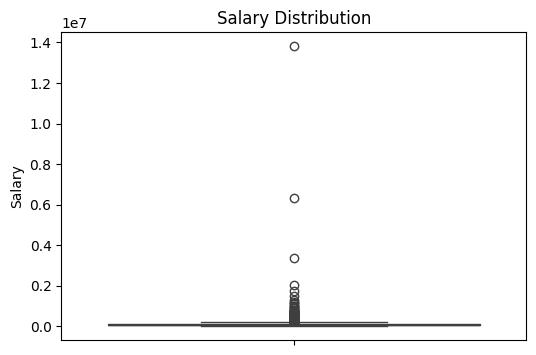

In [18]:
# Creating a Boxplot of compensation variable (target variable)
plt.figure(figsize=(6,4))
sns.boxplot(y=df['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

In [19]:
def remove_outliers(df, columns):
    """Removes rows where the specified columns contain outliers based on the IQR method,
    but only if the outliers are 5% or less of the total values in each column.

    Parameters:
    df (DataFrame): The DataFrame containing the columns to process.
    columns (list of str): A list of column names to check for outliers.

    Returns:
    DataFrame: A new DataFrame with outlier rows removed if outliers are <= 5% of the total rows.
    """
    new_df = df.copy()
    
    for column in columns:
        if column in new_df:
            # Calculate quartiles and IQR
            q1, q3 = np.percentile(new_df[column].dropna(), [25, 75])
            iqr = q3 - q1

            # Define lower and upper bounds
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr

            # Identify outliers
            outliers = new_df[(new_df[column] < lower_limit) | (new_df[column] > upper_limit)]

            # If outliers are less than or equal to 5% of the total rows, remove them
            if len(outliers) <= 0.05 * len(new_df):
                new_df = new_df[(new_df[column] >= lower_limit) & (new_df[column] <= upper_limit)]
            else:
                print(f"Outliers in column '{column}' are more than 5% of total values. No outliers removed.")
    
    return new_df

In [20]:
df_cleaned = remove_outliers(df, columns_num)

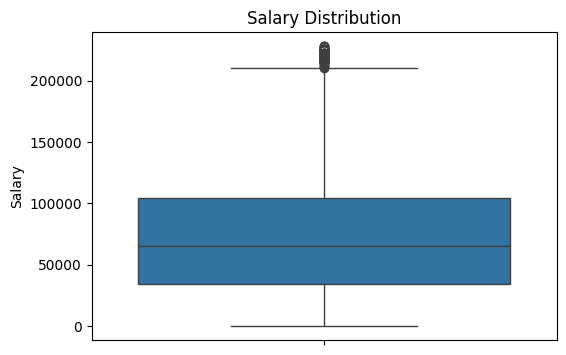

In [21]:
# Creating a Boxplot of compensation variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df_cleaned['ConvertedCompYearly'])
plt.title("Salary Distribution")
plt.ylabel("Salary")
plt.show()

In [22]:
df_cleaned['Country'].value_counts()

Country
United States of America                                1353
Germany                                                  504
United Kingdom of Great Britain and Northern Ireland     437
Ukraine                                                  427
India                                                    424
                                                        ... 
Bahrain                                                    1
Bhutan                                                     1
Cameroon                                                   1
Suriname                                                   1
Cape Verde                                                 1
Name: count, Length: 137, dtype: int64

In [23]:
# Country to continent mapping
country_to_continent = {
    'Pakistan': 'Asia', 'Turkey': 'Asia', 'United States of America': 'North America', 
    'United Kingdom of Great Britain and Northern Ireland': 'Europe', 'Brazil': 'South America', 
    'South Africa': 'Africa', 'France': 'Europe', 'Canada': 'North America', 'Ukraine': 'Europe', 
    'Germany': 'Europe', 'Bolivia': 'South America', 'Morocco': 'Africa', 'India': 'Asia', 
    'Georgia': 'Asia', 'Ireland': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe', 
    'Switzerland': 'Europe', 'Lithuania': 'Europe', 'Netherlands': 'Europe', 'Romania': 'Europe', 
    'Latvia': 'Europe', 'Sweden': 'Europe', 'Austria': 'Europe', 'Portugal': 'Europe', 
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Israel': 'Asia', 'Serbia': 'Europe', 
    'Russian Federation': 'Asia', 'Bangladesh': 'Asia', 'Denmark': 'Europe', 'Poland': 'Europe', 
    'Saudi Arabia': 'Asia', 'Mexico': 'North America', 'Bulgaria': 'Europe', 'Slovakia': 'Europe', 
    'Algeria': 'Africa', 'Venezuela, Bolivarian Republic of...': 'South America', 'Malaysia': 'Asia', 
    'Finland': 'Europe', 'Malta': 'Europe', 'Belgium': 'Europe', 'Croatia': 'Europe', 
    'Argentina': 'South America', 'Slovenia': 'Europe', 'Isle of Man': 'Europe', 'Palestine': 'Asia', 
    'Ecuador': 'South America', 'Greece': 'Europe', 'Paraguay': 'South America', 'Guatemala': 'North America', 
    'New Zealand': 'Oceania', 'Egypt': 'Africa', 'Nigeria': 'Africa', 'South Korea': 'Asia', 
    'Hungary': 'Europe', 'Peru': 'South America', 'Australia': 'Oceania', 'Philippines': 'Asia', 
    'Japan': 'Asia', 'United Arab Emirates': 'Asia', 'Thailand': 'Asia', 'Uruguay': 'South America', 
    'Hong Kong (S.A.R.)': 'Asia', 'China': 'Asia', 'Sri Lanka': 'Asia', 'Singapore': 'Asia', 
    'Armenia': 'Asia', 'Nepal': 'Asia', 'Norway': 'Europe', 'Taiwan': 'Asia', 'Lebanon': 'Asia', 
    'Iran, Islamic Republic of...': 'Asia', 'Benin': 'Africa', 'Democratic Republic of the Congo': 'Africa', 
    'Syrian Arab Republic': 'Asia', 'Namibia': 'Africa', 'Kyrgyzstan': 'Asia', "Lao People's Democratic Republic": 'Asia', 
    'Estonia': 'Europe', 'Tunisia': 'Africa', 'Viet Nam': 'Asia', 'Dominican Republic': 'North America', 
    'Burundi': 'Africa', 'Kazakhstan': 'Asia', 'Rwanda': 'Africa', 'Sierra Leone': 'Africa', 
    'Panama': 'North America', 'Cuba': 'North America', 'Costa Rica': 'North America', 'Uzbekistan': 'Asia', 
    'Colombia': 'South America', 'Ethiopia': 'Africa', 'Jordan': 'Asia', 'Jamaica': 'North America', 
    'Ghana': 'Africa', 'Andorra': 'Europe', 'Republic of North Macedonia': 'Europe', 
    'Bosnia and Herzegovina': 'Europe', 'Kuwait': 'Asia', 'Qatar': 'Asia', 'Kenya': 'Africa', 
    'Luxembourg': 'Europe', 'Belarus': 'Europe', 'Sudan': 'Africa', 'Mauritius': 'Africa', 
    'Indonesia': 'Asia', 'Afghanistan': 'Asia', 'Maldives': 'Asia', 'Kosovo': 'Europe', 
    'Angola': 'Africa', "Côte d'Ivoire": 'Africa', 'Republic of Moldova': 'Europe', 'Zambia': 'Africa', 
    'Turkmenistan': 'Asia', 'Albania': 'Europe', 'Oman': 'Asia', 'Azerbaijan': 'Asia', 'Myanmar': 'Asia', 
    'Montenegro': 'Europe', 'Chile': 'South America', 'Libyan Arab Jamahiriya': 'Africa', 
    'Nicaragua': 'North America', 'Bahrain': 'Asia', 'Bhutan': 'Asia', 'Zimbabwe': 'Africa', 
    'Iceland': 'Europe', 'Mozambique': 'Africa', 'Honduras': 'North America', 'Senegal': 'Africa', 
    'Cambodia': 'Asia', 'Iraq': 'Asia', 'Cameroon': 'Africa', 'Barbados': 'North America', 
    'United Republic of Tanzania': 'Africa', 'Suriname': 'South America', 'Cape Verde': 'Africa', 
    'El Salvador': 'North America', 'Mongolia': 'Asia', 'Nomadic': 'Other', 'Trinidad and Tobago': 'North America', 
    'Malawi': 'Africa'
}

# Mapping the country column to continents
df_cleaned['Continent'] = df_cleaned['Country'].map(country_to_continent)


In [24]:
df_cleaned = df_cleaned.drop(['Country'], axis=1)

In [25]:
print(df_cleaned['Continent'].value_counts())

Continent
Europe           3445
North America    1740
Asia             1206
South America     419
Oceania           200
Africa            168
Name: count, dtype: int64


In [26]:
# Drop row with value other in continent
df_cleaned = df_cleaned[df_cleaned['Continent'] != 'Other'].reset_index(drop=True)

In [27]:
df_cleaned['EdLevel'].unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school'], dtype=object)

In [28]:
def generalize_education(level):
    if level in ['Primary/elementary school']:
        return 'Primary'
    elif level in ['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']:
        return 'Secondary'
    elif level in ["Associate degree (A.A., A.S., etc.)"]:
        return "Associate"
    elif level in ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)"]:
        return "Bachelor’s"
    elif level in ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"]:
        return "Master’s"
    elif level in ["Professional degree (JD, MD, Ph.D, Ed.D, etc.)"]:
        return "Doctorate/Professional"
    elif level in ["Some college/university study without earning a degree"]:
        return "Some College"
    else:
        return "Other"

# Apply function to the column (assuming the column name is 'Edlevel')
df_cleaned['Edlevel_Simplified'] = df['EdLevel'].apply(generalize_education)

In [29]:
df_cleaned = df_cleaned.drop(['EdLevel'], axis=1)

### 5. Exploratory Data Analysis (EDA)

In [30]:
df_cleaned.columns

Index(['ResponseId', 'Age', 'Employment', 'RemoteWork', 'YearsCodePro',
       'OrgSize', 'WorkExp', 'Industry', 'JobSat', 'ConvertedCompYearly',
       'role_category', 'num_languages', 'main_language', 'num_databases',
       'main_database', 'num_platforms', 'main_platform', 'num_webframes',
       'main_webframe', 'Continent', 'Edlevel_Simplified'],
      dtype='object')

In [31]:
# Check Data Types
df_cleaned.dtypes

ResponseId               int64
Age                     object
Employment              object
RemoteWork              object
YearsCodePro            object
OrgSize                 object
WorkExp                float64
Industry                object
JobSat                 float64
ConvertedCompYearly    float64
role_category           object
num_languages            int64
main_language           object
num_databases            int64
main_database           object
num_platforms            int64
main_platform           object
num_webframes            int64
main_webframe           object
Continent               object
Edlevel_Simplified      object
dtype: object

- Age is category: later in section feature engineering i will change it to code.
- YearsCode and YearsCodePro are object type however they have values in numbers i will transform them to integers.
- Another object variables (Age,Currency, OrgSize, EdLevel_simplified, role_category, Industry, continent) I will encode them in the feature engineering section for using them in the model phase.
- Object variables such as remote work, main language, main database, main platform and main webframe I will tranform them to binarys in the feature engineering section. 


In [32]:
# Map age ranges to numerical values (midpoints)
age_mapping = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "Prefer not to say": np.nan  # Handle unknown values as NaN
}

df_cleaned["Age_Num"] = df_cleaned["Age"].map(age_mapping)



In [33]:
# Replace special values with numeric equivalents for YearsCode and YearsCodePro
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].replace({
    'More than 50 years': 51,
    'Less than 1 year': 0
})

# Convert both columns to integers
df_cleaned[['YearsCodePro']] = df_cleaned[['YearsCodePro']].apply(pd.to_numeric, errors='coerce', downcast='integer')

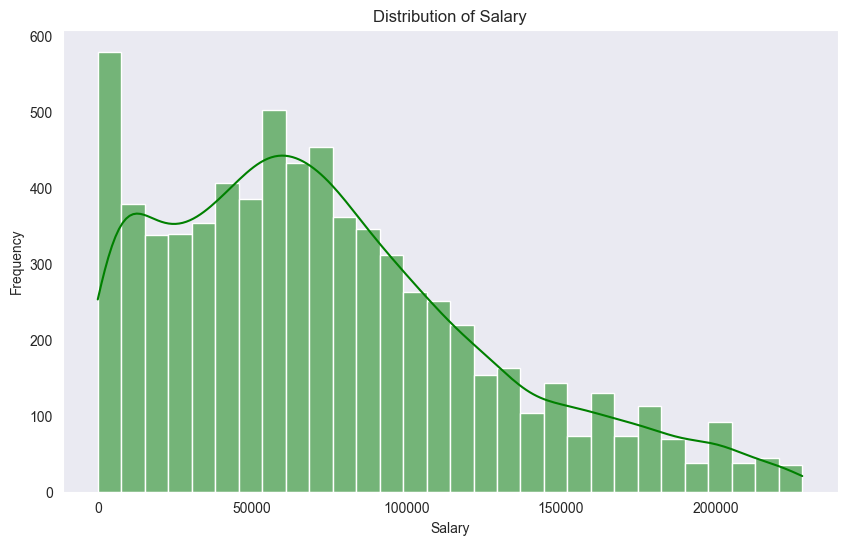

In [34]:
# Target variable
# Histogram of Salary distribution
sns.set_style('dark')
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['ConvertedCompYearly'], kde=True, color='green', bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

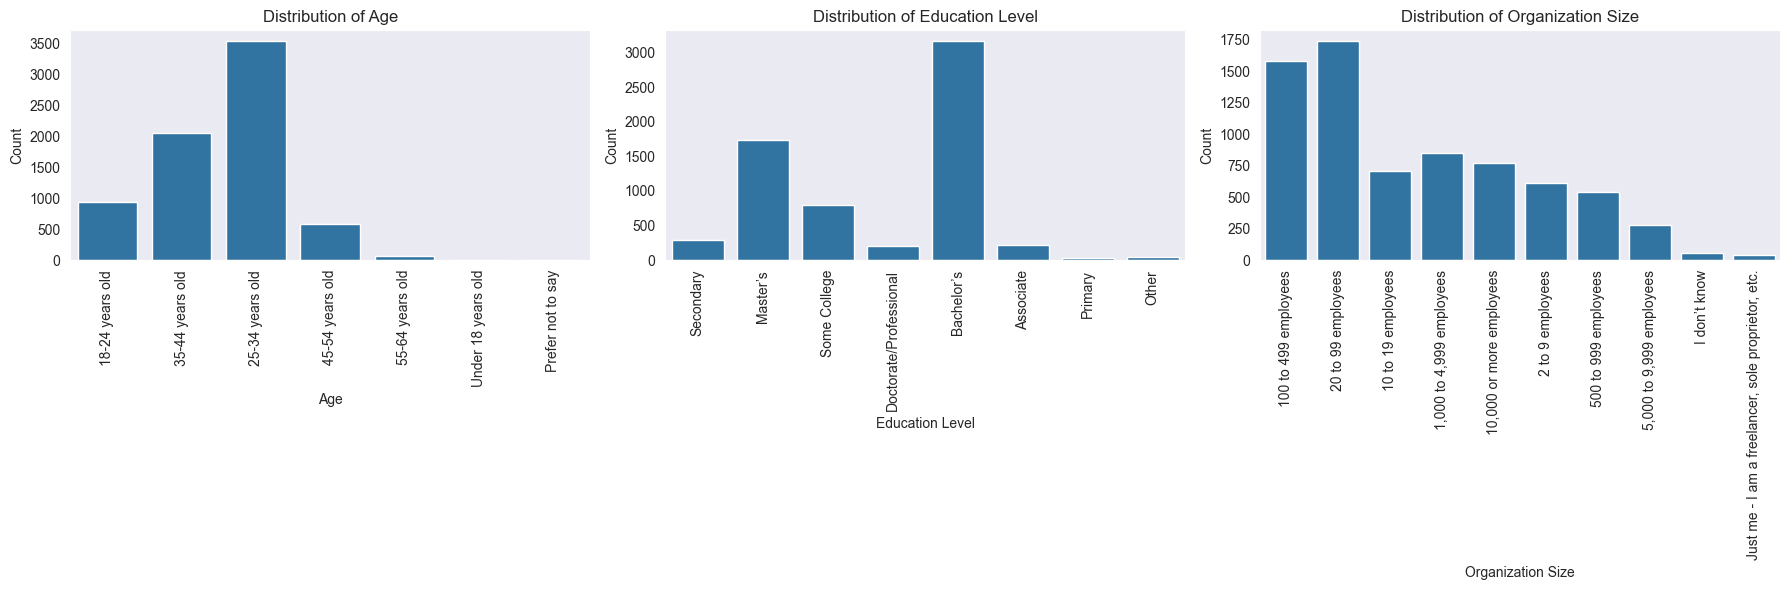

In [35]:
# Age, Education Level and Organization Size
# Create a figure with subplots to display all 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age'
sns.countplot(x='Age', data=df_cleaned, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'Edlevel'
sns.countplot(x='Edlevel_Simplified', data=df_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot for 'OrgSize'
sns.countplot(x='OrgSize', data=df_cleaned, ax=axes[2])
axes[2].set_title('Distribution of Organization Size')
axes[2].set_xlabel('Organization Size')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

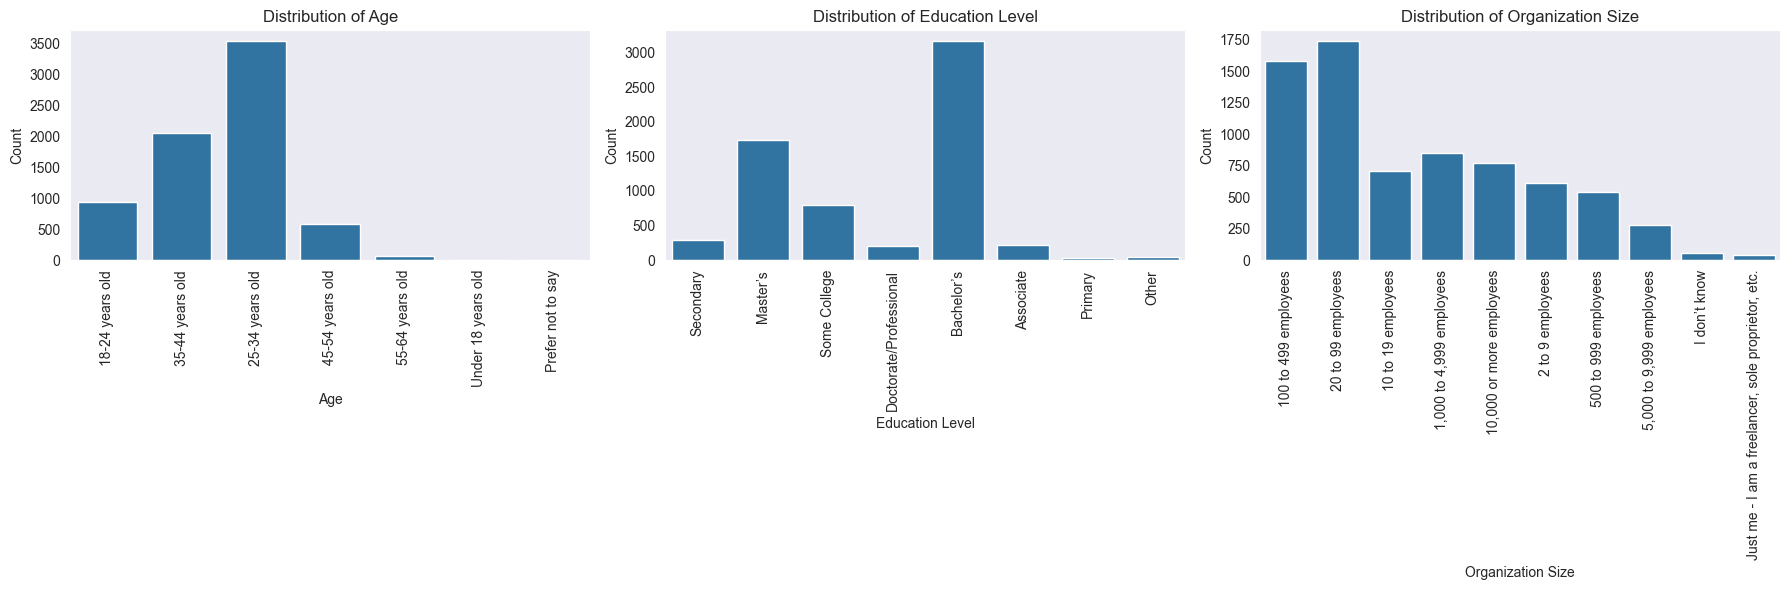

In [36]:
# Age, Education Level and Organization Size
# Create a figure with subplots to display all 3 bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Age'
sns.countplot(x='Age', data=df_cleaned, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'Edlevel'
sns.countplot(x='Edlevel_Simplified', data=df_cleaned, ax=axes[1])
axes[1].set_title('Distribution of Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Plot for 'OrgSize'
sns.countplot(x='OrgSize', data=df_cleaned, ax=axes[2])
axes[2].set_title('Distribution of Organization Size')
axes[2].set_xlabel('Organization Size')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

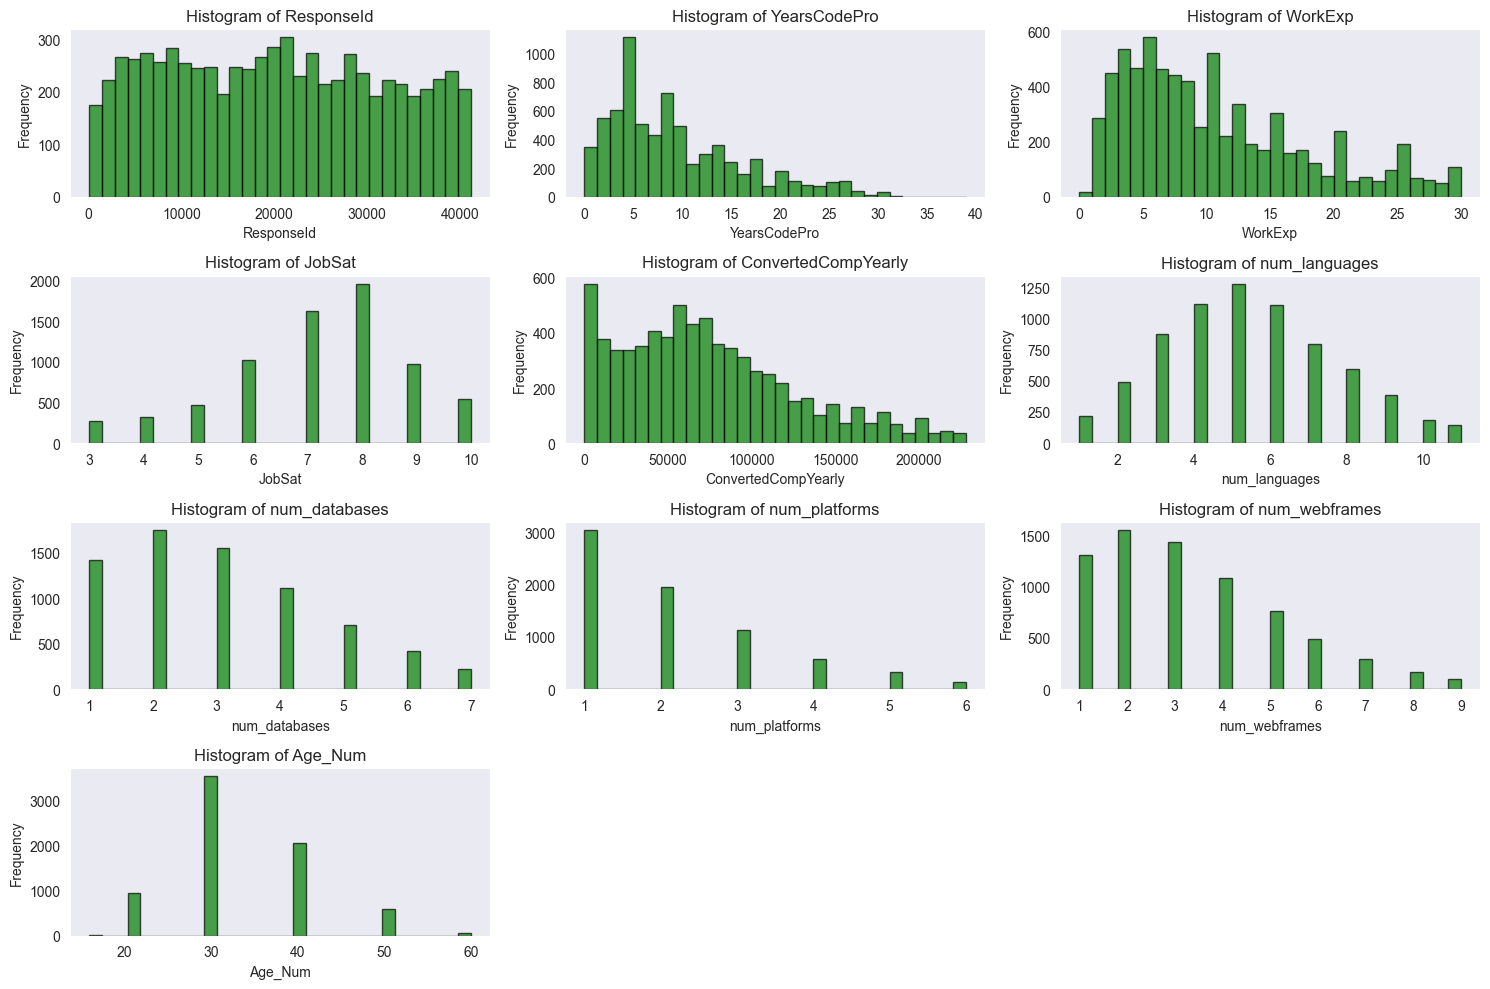

In [37]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numeric columns and create histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust for layout
    plt.hist(df_cleaned[col], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

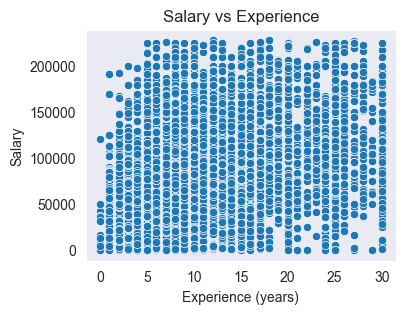

In [38]:
# Scatter plot of Salary vs Experience (assuming 'Experience' is a variable)
plt.figure(figsize=(4,3))
sns.scatterplot(x=df_cleaned['WorkExp'], y=df_cleaned['ConvertedCompYearly'])
plt.title('Salary vs Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Salary')
plt.show()

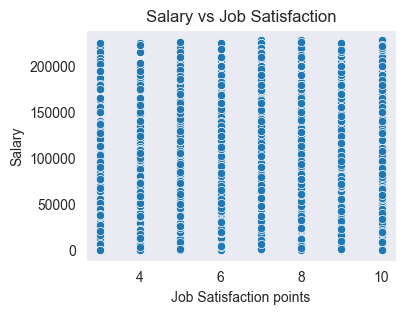

In [39]:
# Scatter plot of Salary vs Experience (assuming 'Experience' is a variable)
plt.figure(figsize=(4,3))
sns.scatterplot(x=df_cleaned['JobSat'], y=df_cleaned['ConvertedCompYearly'])
plt.title('Salary vs Job Satisfaction')
plt.xlabel('Job Satisfaction points')
plt.ylabel('Salary')
plt.show()

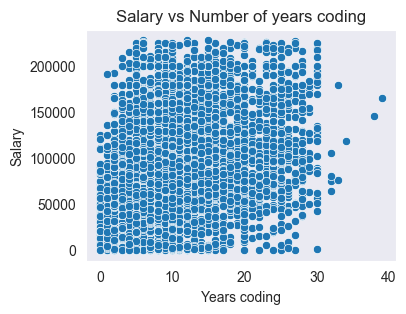

In [40]:
# Scatter plot of Salary vs Experience (assuming 'Experience' is a variable)
plt.figure(figsize=(4,3))
sns.scatterplot(x=df_cleaned['YearsCodePro'], y=df_cleaned['ConvertedCompYearly'])
plt.title('Salary vs Number of years coding')
plt.xlabel('Years coding')
plt.ylabel('Salary')
plt.show()

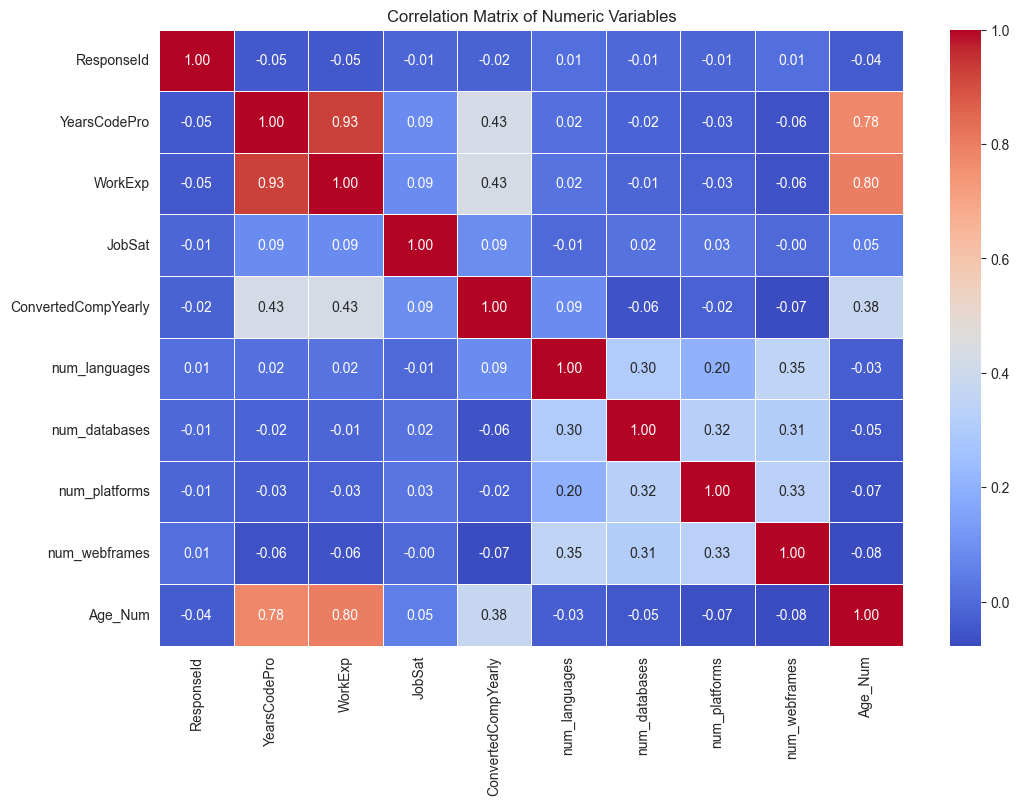

In [41]:
# Compute correlation matrix for numeric variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix of Numeric Variables")

# Show the plot
plt.show()


From the numeric variables correlation analysis we could see that potential influential variables for our model (some correlation with Salary) are YearsCodePro, WorkExp and Age but since years code pro and  work experience are highly correlated I will keep only work experience variable and age variable.

In [42]:
columns_to_drop = ['YearsCodePro', 'JobSat',  'num_languages',  'num_databases', 'num_platforms',  'num_webframes', 'Employment', 'Age']

df_cleaned = df_cleaned.drop(columns= columns_to_drop)

### 6. Feature Engineering 

In [43]:
df_cleaned.columns

Index(['ResponseId', 'RemoteWork', 'OrgSize', 'WorkExp', 'Industry',
       'ConvertedCompYearly', 'role_category', 'main_language',
       'main_database', 'main_platform', 'main_webframe', 'Continent',
       'Edlevel_Simplified', 'Age_Num'],
      dtype='object')

In [44]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7185 entries, 0 to 7184
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           7185 non-null   int64  
 1   RemoteWork           7185 non-null   object 
 2   OrgSize              7185 non-null   object 
 3   WorkExp              7185 non-null   float64
 4   Industry             7185 non-null   object 
 5   ConvertedCompYearly  7185 non-null   float64
 6   role_category        7185 non-null   object 
 7   main_language        7185 non-null   object 
 8   main_database        7185 non-null   object 
 9   main_platform        7185 non-null   object 
 10  main_webframe        7185 non-null   object 
 11  Continent            7178 non-null   object 
 12  Edlevel_Simplified   6482 non-null   object 
 13  Age_Num              7183 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 786.0+ KB


In [45]:
# Feature Engineering: Creating new features
df_cleaned['Experience_per_Age'] = df_cleaned['WorkExp'] / df_cleaned['Age_Num']  # Ratio of experience to age

In [46]:
# Encode categorical variables
categorical_cols = ["RemoteWork", "OrgSize", "Industry", 
                    "role_category", "main_language", "main_database", 
                    "main_platform", "main_webframe", "Continent", "Edlevel_Simplified"]
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

Mapping for RemoteWork: {'Hybrid (some remote, some in-person)': np.int64(0), 'In-person': np.int64(1), 'Remote': np.int64(2)}
Mapping for OrgSize: {'1,000 to 4,999 employees': np.int64(0), '10 to 19 employees': np.int64(1), '10,000 or more employees': np.int64(2), '100 to 499 employees': np.int64(3), '2 to 9 employees': np.int64(4), '20 to 99 employees': np.int64(5), '5,000 to 9,999 employees': np.int64(6), '500 to 999 employees': np.int64(7), 'I don’t know': np.int64(8), 'Just me - I am a freelancer, sole proprietor, etc.': np.int64(9)}
Mapping for Industry: {'Banking/Financial Services': np.int64(0), 'Computer Systems Design and Services': np.int64(1), 'Energy': np.int64(2), 'Fintech': np.int64(3), 'Government': np.int64(4), 'Healthcare': np.int64(5), 'Higher Education': np.int64(6), 'Insurance': np.int64(7), 'Internet, Telecomm or Information Services': np.int64(8), 'Manufacturing': np.int64(9), 'Media & Advertising Services': np.int64(10), 'Other:': np.int64(11), 'Retail and Consu

In [47]:
df_cleaned

,ResponseId,RemoteWork,OrgSize,WorkExp,Industry,ConvertedCompYearly,role_category,main_language,main_database,main_platform,main_webframe,Continent,Edlevel_Simplified,Age_Num,Experience_per_Age
0,73,0,3,3.0,13,7322.0,1,2,22,14,2,1,6,21.0,0.142857
1,380,2,5,7.0,1,91295.0,1,20,10,1,19,1,3,40.0,0.175000
2,390,2,1,8.0,14,110000.0,0,17,17,1,12,3,7,30.0,0.266667
3,393,0,0,18.0,12,161044.0,3,5,0,1,24,2,2,40.0,0.450000
4,399,2,0,30.0,5,195000.0,7,3,21,14,2,3,7,50.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,41149,2,4,20.0,13,60000.0,7,4,19,1,2,5,3,40.0,0.500000
7181,41163,1,7,26.0,3,96666.0,7,3,25,8,34,2,6,50.0,0.520000
7182,41165,2,0,13.0,6,94000.0,7,1,11,1,34,3,3,40.0,0.325000
7183,41174,2,3,10.0,3,23256.0,3,5,19,1,0,0,1,30.0,0.333333


In [48]:
df_cleaned = df_cleaned.dropna()

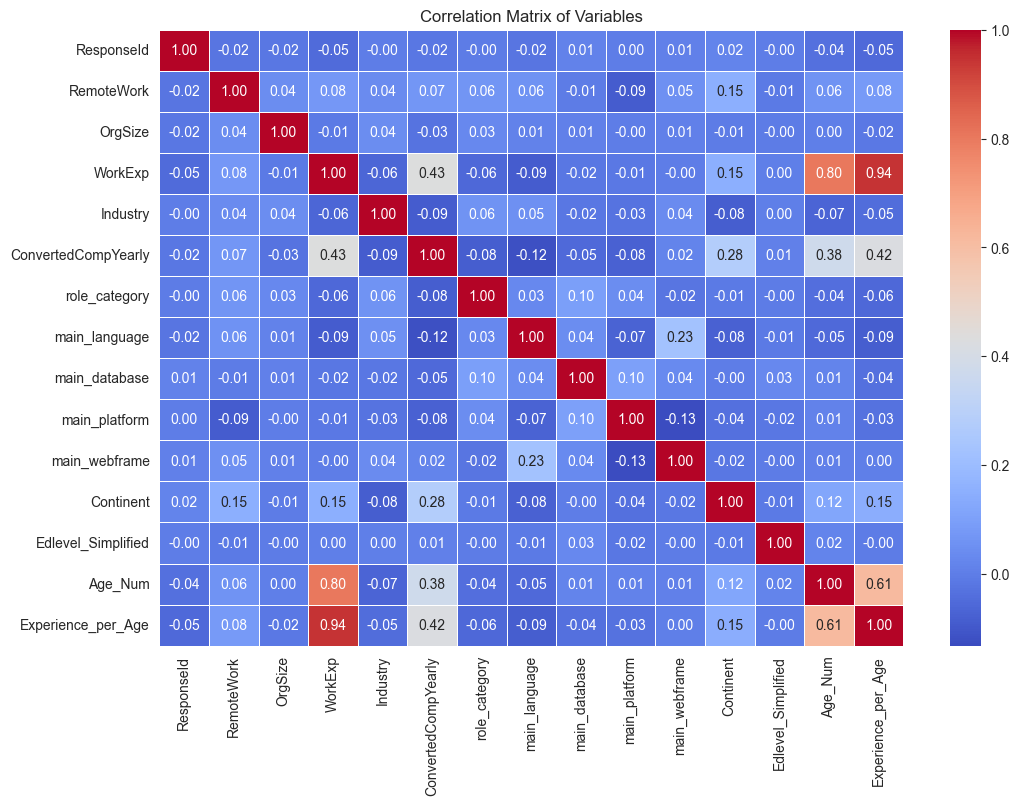

In [49]:
# Compute correlation matrix for numeric variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of the heatmap
plt.title("Correlation Matrix of Variables")

# Show the plot
plt.show()

In [50]:
# Define features and target variable
X = df_cleaned.drop(columns=["ConvertedCompYearly", "ResponseId"])
y = df_cleaned["ConvertedCompYearly"]


In [51]:
X

,RemoteWork,OrgSize,WorkExp,Industry,role_category,main_language,main_database,main_platform,main_webframe,Continent,Edlevel_Simplified,Age_Num,Experience_per_Age
0,0,3,3.0,13,1,2,22,14,2,1,6,21.0,0.142857
1,2,5,7.0,1,1,20,10,1,19,1,3,40.0,0.175000
2,2,1,8.0,14,0,17,17,1,12,3,7,30.0,0.266667
3,0,0,18.0,12,3,5,0,1,24,2,2,40.0,0.450000
4,2,0,30.0,5,7,3,21,14,2,3,7,50.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,2,4,20.0,13,7,4,19,1,2,5,3,40.0,0.500000
7181,1,7,26.0,3,7,3,25,8,34,2,6,50.0,0.520000
7182,2,0,13.0,6,7,1,11,1,34,3,3,40.0,0.325000
7183,2,3,10.0,3,3,5,19,1,0,0,1,30.0,0.333333


In [52]:
X.isna().sum()

RemoteWork            0
OrgSize               0
WorkExp               0
Industry              0
role_category         0
main_language         0
main_database         0
main_platform         0
main_webframe         0
Continent             0
Edlevel_Simplified    0
Age_Num               0
Experience_per_Age    0
dtype: int64

In [53]:
y

0         7322.0
1        91295.0
2       110000.0
3       161044.0
4       195000.0
          ...   
7180     60000.0
7181     96666.0
7182     94000.0
7183     23256.0
7184    170000.0
Name: ConvertedCompYearly, Length: 7183, dtype: float64

### 7. Splitting Data into Training & Testing Sets

In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [55]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 8. Model Training

In [56]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [57]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### 9. Model Performance Metrics

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, R2 Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression - MAE: 33543.69, R2 Score: 0.30
Random Forest - MAE: 26631.15, R2 Score: 0.51


In [63]:
# Get the lin reg model coefficients 
coefficients = lin_reg.coef_  # The slope (or weight) for each feature
intercept = lin_reg.intercept_  # The y-intercept

# Print coefficients with corresponding feature names
for feature, coef in zip(X.columns, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")
print(f'Intercept: {intercept}')

Feature: RemoteWork, Coefficient: 301.0335017798402
Feature: OrgSize, Coefficient: -988.3122838494746
Feature: WorkExp, Coefficient: -23711.097036722233
Feature: Industry, Coefficient: -2134.5049675070004
Feature: role_category, Coefficient: -2694.314596437789
Feature: main_language, Coefficient: -3996.580905964917
Feature: main_database, Coefficient: -1755.497823661597
Feature: main_platform, Coefficient: -2755.255449625862
Feature: main_webframe, Coefficient: 1452.0789901478895
Feature: Continent, Coefficient: 10493.890135732108
Feature: Edlevel_Simplified, Coefficient: 297.4297134556933
Feature: Age_Num, Coefficient: 17693.48361244293
Feature: Experience_per_Age, Coefficient: 31220.500528567114
Intercept: 74046.05255830142


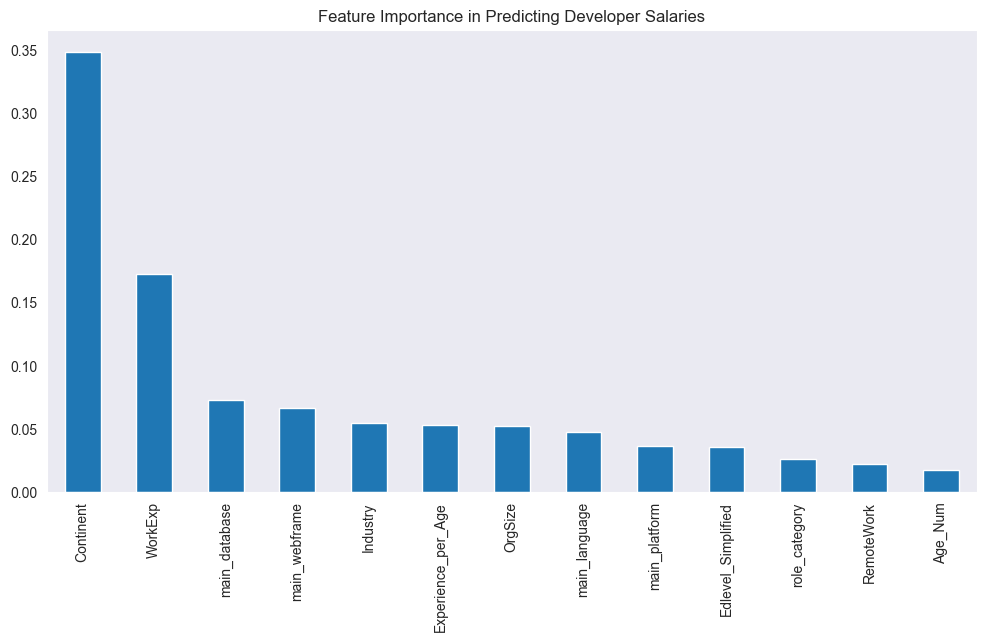

In [59]:
# Feature Importance (Random Forest)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance in Predicting Developer Salaries")
plt.show()

### 10. Conclusion & Future Work

- Continent was highly in teh Random Forest Model, so maybe it would be a goof idea to split by continent and try a model per continent. 
- Work Experience was 